# Create Bias Plots 
Assess the average climatological biases of the SPEAR dataset as compared with Livneh

In [2]:
# imports for geospatial analysis
import sys
sys.path.insert(1, '../notebooks')
from imports import *
mask_ds = xr.open_dataset("/work/Julian.Schmitt/data/climatology/ensemble/snow/SPEAR_median_yearly_swemax.nc")
lat_new = np.arange(32, 52, 0.5)
lon_new = np.arange(235, 255, 0.5)

In [9]:
# lat lon for WUS, ensemble filenames
plt.style.use("fivethirtyeight")

# get snow cmap
bias_cmap = matplotlib.cm.get_cmap('RdBu')
#snow_cmap.set_bad(color='gray')

# get states
states = cfeature.NaturalEarthFeature(category='cultural',
                                     name='admin_1_states_provinces_shp',
                                     scale='50m',
                                     facecolor='none',
                                     edgecolor='black',
                                     linewidth=1)

# get HUC2 regions 
HUC2 = ShapelyFeature(Reader("/work/Julian.Schmitt/data/shape/huc2_regions.shp").geometries(),
                             crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=1.5)

def is_winter(month):
    return (month <=4) | (month >=10)

## SPEAR Snowfall bias

In [10]:
# load spear snow files in
ens_snow_files = glob("/work/Julian.Schmitt/data/climatology/ensemble/snow/*.nc")
ens_snow_mean = sum([xr.open_dataset(f)["snow"] for f in ens_snow_files])/len(ens_snow_files)

# load livneh snow file in
liv_clim = xr.open_dataset("/work/Julian.Schmitt/data/climatology/livneh/livneh_swe_average_climatology.nc")

# compute bias
spear_snow_bias = ((ens_snow_mean - liv_clim.swe )/liv_clim.swe*100).where(mask_ds >20).snow

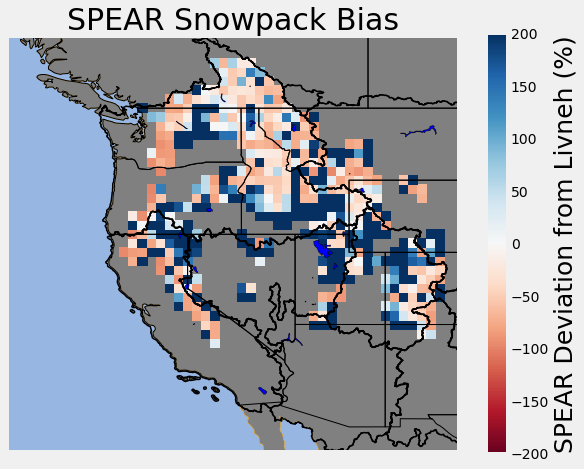

In [11]:
plt.figure(figsize=(9,9))

# load projection
ax = plt.axes(projection=ccrs.PlateCarree())

# add land, lakes, oceans, and HUC2 regions
ax.add_feature(cfeature.LAND, edgecolor="orange", facecolor="grey", zorder=0)
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor="blue")
ax.add_feature(cfeature.OCEAN)
ax.add_feature(HUC2)
# add states 
ax.add_feature(states)



vrange = 200
# plot snow bias across western us
plot_snow_bias = spear_snow_bias.plot(ax=ax, transform = ccrs.PlateCarree(), add_colorbar=False,
         cmap=bias_cmap, vmin=-vrange, vmax=vrange)

# orientate color bar
cbar = plt.colorbar(plot_snow_bias, 
                   orientation='vertical',
                   shrink=0.8)
cbar.set_label("SPEAR Deviation from Livneh (%)", fontsize = 25)

# set extent to Western US
ax.set_extent((-130, -105, 30, 53), crs=ccrs.PlateCarree())

# set plot attributes and labels
ax.set_title(f"SPEAR Snowpack Bias", fontsize = 30);
#plt.savefig("/home/Julian.Schmitt/plots/fall/snow_bias_percentage.png", dpi=200)

## Winter Precipitation Bias

In [12]:
# open files - ensemble mean and livneh dataset
ens_prec_files = glob("/work/Julian.Schmitt/data/climatology/ensemble/prec/*.nc")
ens_prec_mean = sum([xr.open_dataset(f)["prec"] for f in ens_prec_files])/len(ens_prec_files)*60*60*24 # adjust from seconds to days 

livneh_prec = xr.open_dataset("/work/Julian.Schmitt/data/climatology/livneh/livneh_prec_average_climatology.nc")

# calculate precipitation bias
precip_bias = (ens_prec_mean-livneh_prec.prec)/livneh_prec.prec*100

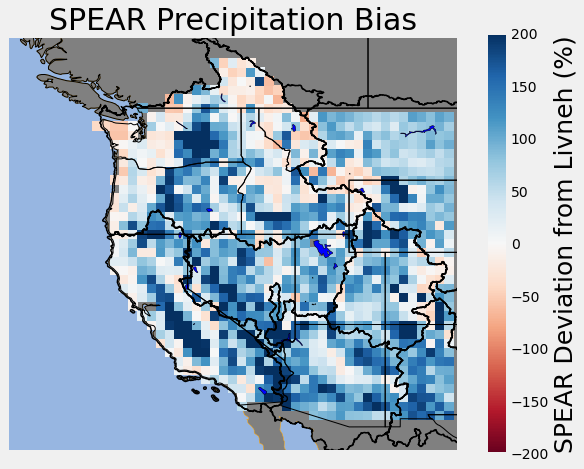

In [76]:
vrange = 200
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,9))

# load projection
ax = plt.axes(projection=ccrs.PlateCarree())

# add land, lakes, oceans, and HUC2 regions
ax.add_feature(cfeature.LAND, edgecolor="orange", facecolor="grey", zorder=0)
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor="blue")
ax.add_feature(cfeature.OCEAN)
ax.add_feature(HUC2)
# add states 
ax.add_feature(states)




plot_precip_bias = precip_bias.plot(ax=ax, transform = ccrs.PlateCarree(), add_colorbar=False,
         cmap=bias_cmap, vmin=-vrange, vmax=vrange)


cbar = plt.colorbar(plot_precip_bias, 
                   orientation='vertical',
                   shrink=0.8)
#cbar.ax.set_yticklabels(yticklabels)
cbar.set_label("SPEAR Deviation from Livneh (%)", fontsize = 25)


# set extent to Western US
ax.set_extent((-130, -105, 30, 53), crs=ccrs.PlateCarree())

# set plot attributes and labels
ax.set_title(f"SPEAR Precipitation Bias", fontsize = 30);
plt.savefig("/home/Julian.Schmitt/plots/fall/spear_precip_bias_percentage.png", dpi=200)

## Generate labeled plot of HUC2 regions

In [13]:
# get centriods for 
HUC22 = Reader("/work/Julian.Schmitt/data/shape/huc2_regions.shp").geometries()
ar = list(HUC2.geometries())

Text(0.5, 1.0, 'Western HUC2 Watershed Regions')

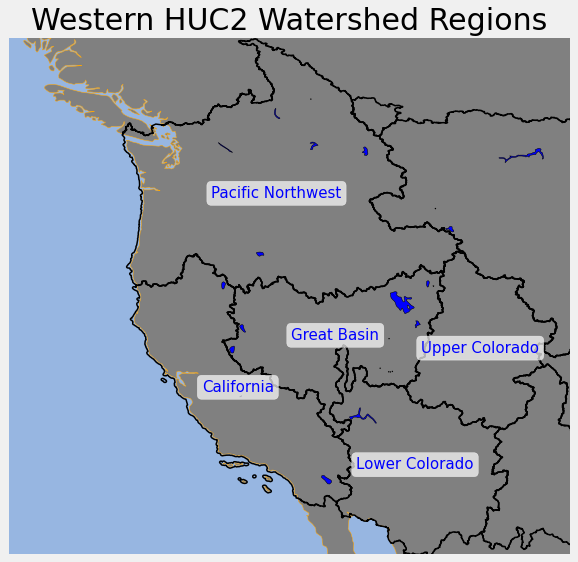

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,9))

# load projection
ax = plt.axes(projection=ccrs.PlateCarree())

# add land, lakes, oceans, and HUC2 regions
ax.add_feature(cfeature.LAND, edgecolor="orange", facecolor="grey", zorder=0)
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor="blue")
ax.add_feature(cfeature.OCEAN)
ax.add_feature(HUC2)
# add states 
#ax.add_feature(states)

d = {"17": "California", "16": "Pacific Northwest", "15":"Great Basin", "14":"Lower Colorado", "13": "Upper Colorado"}
bbox=dict(boxstyle="round", alpha=0.7, color='w')

for i in range(len(ar)):
    try:
        plt.annotate(d[str(i)], 
                     xy = np.array(ar[i].centroid),#(np.array(ar[i].centroid)[0]-2.2, np.array(ar[i].centroid)[1]), 
                     fontsize = 15, 
                     ha= 'center', va="center",
                     bbox = bbox,
                     color = "b")
        
    except:
        pass

        
        
ax.set_extent((-130, -105, 30, 53), crs=ccrs.PlateCarree())

plt.title("Western HUC2 Watershed Regions", fontsize = 30)

#plt.savefig("/home/Julian.Schmitt/plots/fall/huc2_names.png", dpi=200)

## Temperature Bias
We calculate the temperature bias as the difference between the weighted average of the maximum and minimum temperatures for each dataset

In [4]:
# read livneh and spear temperature files
ens_tmax_files = glob("/work/Julian.Schmitt/data/climatology/ensemble/tmax/*.nc")
livneh_tmax = xr.open_dataset("/work/Julian.Schmitt/data/climatology/livneh/livneh_tmax_average_climatology.nc")

ens_tmin_files = glob("/work/Julian.Schmitt/data/climatology/ensemble/tmin/*.nc")
livneh_tmin = xr.open_dataset("/work/Julian.Schmitt/data/climatology/livneh/livneh_tmin_average_climatology.nc")

In [6]:
# get tmax data for spear
ens_tmaxs = []
for file in ens_tmax_files:
    try:
        ens_tmaxs.append(xr.open_dataset(file).tmax)
    except AttributeError:
        print(file)
        
# average ensemble mean and convert from Kelvin to C
ens_tmax_avg = sum(ens_tmaxs)/len(ens_tmaxs) - 273.15

ens_tmins = []
for file in ens_tmin_files:
    try:
        ens_tmins.append(xr.open_dataset(file).tmin)
    except AttributeError:
        print(file)

ens_tmin_avg = sum(ens_tmins)/len(ens_tmins) - 273.15

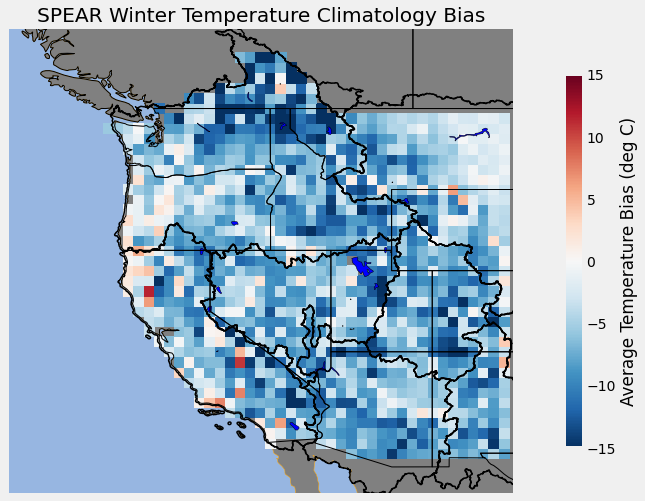

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))

# get snow cmap
bias_cmap = matplotlib.cm.get_cmap('RdBu_r')
#snow_cmap.set_bad(color='gray')

# get states
states = cfeature.NaturalEarthFeature(category='cultural',
                                     name='admin_1_states_provinces_shp',
                                     scale='50m',
                                     facecolor='none',
                                     edgecolor='black',
                                     linewidth=1)

# get HUC2 regions 
HUC2 = ShapelyFeature(Reader("/work/Julian.Schmitt/data/shape/huc2_regions.shp").geometries(),
                             crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=1.5)

# load projection
ax = plt.axes(projection=ccrs.PlateCarree())

# add land, lakes, oceans, and HUC2 regions
ax.add_feature(cfeature.LAND, edgecolor="orange", facecolor="grey", zorder=0)
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor="blue")
ax.add_feature(cfeature.OCEAN)
ax.add_feature(HUC2)
# add states 
ax.add_feature(states)



# define new regionmask where values represent drought conditions
# uncomment when doing different year - save computation speed for now

tbias = (ens_tmin_avg +ens_tmax_avg - livneh_tmin.tmin - livneh_tmax.tmax).plot(ax=ax, transform = ccrs.PlateCarree(), add_colorbar=False,
         cmap=bias_cmap, vmin=-15, vmax=15)

#cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(cmap=newcmp, ax=ax, cax=cax)


cbar = plt.colorbar(tbias, 
                   orientation='vertical',
                   shrink=0.8)
#cbar.ax.set_yticklabels(yticklabels)
#cbar.set_label("Bias - SPEAR minus LIVNEH (deg C)")
cbar.set_label("Temperature Bias (deg C)")

# set extent to Western US
ax.set_extent((-130, -105, 30, 53), crs=ccrs.PlateCarree())

# set plot attributes and labels
ax.set_title(f"SPEAR Winter Temperature Climatology Bias");
plt.savefig("/home/Julian.Schmitt/plots/spear_T_bias.png", dpi=170)

## Make Panel Plot


/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/nbhome/Julian.Schmitt/miniconda3/envs/noaa2/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


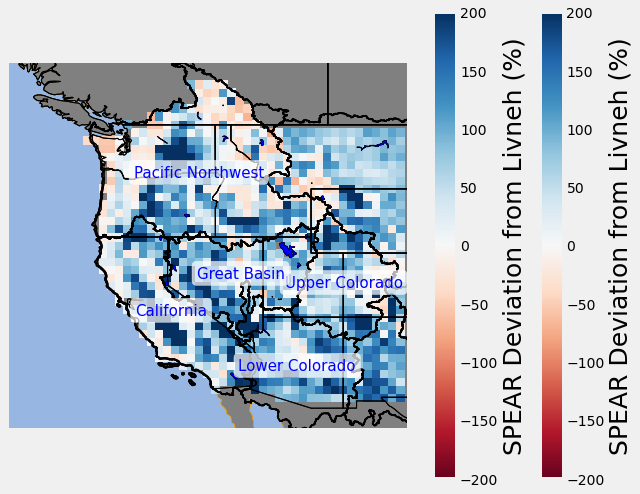

In [33]:
# combine into panel plot
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

ax = ax.ravel()

# first plot Watershed labels
# load projection
ax[0] = plt.axes(projection=ccrs.PlateCarree())

# add land, lakes, oceans, and HUC2 regions
ax[0].add_feature(cfeature.LAND, edgecolor="orange", facecolor="grey", zorder=0)
ax[0].add_feature(cfeature.LAKES, edgecolor='black', facecolor="blue")
ax[0].add_feature(cfeature.OCEAN)
ax[0].add_feature(HUC2)
# add states 
#ax.add_feature(states)

d = {"17": "California", "16": "Pacific Northwest", "15":"Great Basin", "14":"Lower Colorado", "13": "Upper Colorado"}
bbox=dict(boxstyle="round", alpha=0.7, color='w')

for i in range(len(ar)):
    try:
        ax[0].annotate(d[str(i)], 
                     xy = np.array(ar[i].centroid),#(np.array(ar[i].centroid)[0]-2.2, np.array(ar[i].centroid)[1]), 
                     fontsize = 15, 
                     ha= 'center', va="center",
                     bbox = bbox,
                     color = "b")
        
    except:
        pass

        
        
ax[0].set_extent((-130, -105, 30, 53), crs=ccrs.PlateCarree())

ax[0].set_title("Western HUC2 Watershed Regions", fontsize = 30)


# second plot SWE bias 
ax[1] = plt.axes(projection=ccrs.PlateCarree())

# add land, lakes, oceans, and HUC2 regions
ax[1].add_feature(cfeature.LAND, edgecolor="orange", facecolor="grey", zorder=0)
ax[1].add_feature(cfeature.LAKES, edgecolor='black', facecolor="blue")
ax[1].add_feature(cfeature.OCEAN)
ax[1].add_feature(HUC2)
# add states 
ax[1].add_feature(states)



vrange = 200
# plot snow bias across western us
plot_snow_bias = spear_snow_bias.plot(ax=ax[1], transform = ccrs.PlateCarree(), add_colorbar=False,
         cmap=bias_cmap, vmin=-vrange, vmax=vrange)

# orientate color bar
cbar = plt.colorbar(plot_snow_bias, ax = ax[1],
                   orientation='vertical',
                   shrink=0.8)
cbar.set_label("SPEAR Deviation from Livneh (%)", fontsize = 25)

# set extent to Western US
ax[1].set_extent((-130, -105, 30, 53), crs=ccrs.PlateCarree())

# set plot attributes and labels
#ax[1].set_title(f"SPEAR Snowpack Bias", fontsize = 30);


# precipitation bias
# load projection
ax[2] = plt.axes(projection=ccrs.PlateCarree())

# add land, lakes, oceans, and HUC2 regions
ax[2].add_feature(cfeature.LAND, edgecolor="orange", facecolor="grey", zorder=0)
ax[2].add_feature(cfeature.LAKES, edgecolor='black', facecolor="blue")
ax[2].add_feature(cfeature.OCEAN)
ax[2].add_feature(HUC2)
# add states 
ax[2].add_feature(states)




plot_precip_bias = precip_bias.plot(ax=ax[2], transform = ccrs.PlateCarree(), add_colorbar=False,
         cmap=bias_cmap, vmin=-vrange, vmax=vrange)


cbar = plt.colorbar(plot_precip_bias, ax = ax[2],
                   orientation='vertical',
                   shrink=0.8)
#cbar.ax.set_yticklabels(yticklabels)
cbar.set_label("SPEAR Deviation from Livneh (%)", fontsize = 25)


# set extent to Western US
ax[2].set_extent((-130, -105, 30, 53), crs=ccrs.PlateCarree())

# set plot attributes and labels
#ax[2].set_title(f"SPEAR Precipitation Bias", fontsize = 30);
